In [1]:
import pandas as pd 
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv("./Dataset/train.csv")
test_df = pd.read_csv("./Dataset/test.csv")

In [3]:
train_df_c = train_df.copy()
test_df_c = test_df.copy()

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      6548 non-null   object 
 1   Age                             6456 non-null   float64
 2   Gender                          6548 non-null   object 
 3   Home Region                     6546 non-null   object 
 4   Home City                       6546 non-null   object 
 5   Program ID                      6548 non-null   object 
 6   Program Main Category Code      6548 non-null   object 
 7   Program Sub Category Code       5613 non-null   object 
 8   Technology Type                 3566 non-null   object 
 9   Program Skill Level             4902 non-null   object 
 10  Program Presentation Method     6548 non-null   object 
 11  Program Start Date              6548 non-null   object 
 12  Program End Date                65

# Feature Engieerning

In [5]:
# First feature is is gpa_grade
# in gpa system of 5 the grading is as follows 
# 2.00- 2.74 Acceptable
# 2.75 - 3.74 Good
# 3.75 - 4.49 Very Good
# 4.5 - 5 Excellent

# in gpa system of 4 the grading is as follows 
# 1.00- 1.74 Acceptable
# 1.75 - 2.74 Good
# 2.75 - 3.49 Very Good
# 3.5 - 4 Excellent



In [6]:
def classify_gpa(score, system):
    if system == 5:
        if 2.00 <= score <= 2.74:
            return "Acceptable"
        elif 2.75 <= score <= 3.74:
            return "Good"
        elif 3.75 <= score <= 4.49:
            return "Very Good"
        elif 4.5 <= score <= 5.00:
            return "Excellent"
        else:
            return "Not Applicable"
    elif system == 4:
        if 1.00 <= score <= 1.74:
            return "Acceptable"
        elif 1.75 <= score <= 2.74:
            return "Good"
        elif 2.75 <= score <= 3.49:
            return "Very Good"
        elif 3.5 <= score <= 4.00:
            return "Excellent"
        else:
            return "Not Applicable"
    else:
        return "Unknown System"

train_df_c['GPA_Grade'] = train_df_c.apply(lambda x: classify_gpa(x['University Degree Score'], x['University Degree Score System']), axis=1)

train_df_c[['University Degree Score', 'University Degree Score System', 'GPA_Grade']].head()


,University Degree Score,University Degree Score System,GPA_Grade
0,2.44,4.0,Good
1,5.00,5.0,Excellent
2,3.50,5.0,Good
3,3.55,5.0,Good
4,4.00,5.0,Very Good


## How ***far*** each city is from riyadh is
## that could play a big factor

In [7]:
unq_cites=train_df["Home City"].unique()
len(unq_cites)

93

In [8]:
# Split the list into two halves
half = len(unq_cites) // 2
first_half = unq_cites[:half]
second_half = unq_cites[half:]

# Write the first half to a file
with open('cities_1.txt', 'w', encoding='utf-8') as f:
    for city in first_half:
        f.write(str(city) + '\n')

# Write the second half to a file
with open('cities_2.txt', 'w', encoding='utf-8') as f:
    for city in second_half:
        f.write(str(city) + '\n')

# Creating a dict with the distance to riyadh

In [9]:
# Let's create a dictionary with two keys: "cities" and "distances", where each key corresponds to a list.
cities_distance = {
    "cities": [
        "الرياض", "خميس مشيط", "حفر الباطن", "جدة", "نجران",
        "مكة المكرمة", "ينبع", "المدينة المنورة", "الهفوف", "بريدة",
        "تبوك", "الأحساء", "الجبيل", "عرعر",
        "أبها", "أبو عريش", "الدمام", "الطائف", "الباحة",
        "أحد المسارحة", "حائل", "الدلم", "القطيف", "الدرعية",
        "جيزان",  "الخبر", "المجمعة", "الخرج",
        "الظهران", "الدوادمي", "المزاحمية", "عنيزة", "القنفذة",
        "الليث", "شرورة", "الرس", "صامطة", "شقراء",
        "سيهات", "صفوى", "سكاكا", "البدائع", "رابغ", "رفحاء"
    ],
    "distances": [
        0, 822.50, 422.67, 849.76, 838.30,
        793.92, 879.45, 720.19, 383.63, 330.55,
        1089.64, 286.11, 390.41, 895.48,
        842.43, 947.89, 389.73, 749.34, 750.82,
        830.20, 592.76, 114, 389.83, 17.01,
        842.85, 393.04, 192.60, 85.33,
        387.14, 237.85, 50.13, 315.70, 849,
        832.22, 802.25, 409, 981.68, 160.07,
        387.74, 387.62, 872.30, 331.26, 809.47, 635.88
    ]
}



# Convert the dictionary to a DataFrame
df_cities_distance = pd.DataFrame(cities_distance)

df_cities_distance


,cities,distances
0,الرياض,0.00
1,خميس مشيط,822.50
2,حفر الباطن,422.67
3,جدة,849.76
4,نجران,838.30
5,مكة المكرمة,793.92
6,ينبع,879.45
7,المدينة المنورة,720.19
8,الهفوف,383.63
9,بريدة,330.55


In [10]:
import pandas as pd

# Your original data
cities_1 = ['بيشة', 'محايل', 'المذنب', 'الخفجي', 'رأس تنورة', 'ضمد', 'القريات', 'حوطة بني تميم', 'ضبا', 'مهد الذهب', 'بارق', 'بيش', 'دومة الجندل', 'صبيا', 'العرضيات', 'الحناكية', 'سراة عبيدة', 'أحد رفيدة', 'تربة', 'العلا', 'الحريملاء', 'بلجرشي', 'بقيق', 'القرى', 'رجال ألمع', 'المجاردة', 'وادي الدواسر', 'وادي الفرع', 'محايل عسير', 'الزلفي', 'بدر', 'تثليت', 'عنك', 'البكيرية', 'طريف', 'بني حسن', 'رياض الخبراء', 'طبرجل', 'ثادق', 'الجموم', 'الغاط', 'تيماء', 'ظهران الجنوب', 'أملج', 'ابها', 'الدرب', 'بحرة']
distances_1 = [672.65, 390.1, 284.82, 450.32, 403.6, 936.61, 850.27, 89.49, 1140.38, 608.47, 19.43, 774.62, 883.95, 938.15, 17.9, 626.83, 823.43, 824.88, 649.55, 904.66, 77.5, 756.95, 390.94, 349.8, 856.22, 794.9, 845.47, 509.48, 954.17, 262.24, 812.27, 661.43, 387.84, 357.35, 897.82, 762.45, 350.45, 14.6, 108.64, 794.73, 231.97, 879.41, 848.66, 949.86, 842.43, 899.74, 829.66]

# New data
cities_2 = ["الرياض", "خميس مشيط", "حفر الباطن", "جدة", "نجران", "مكة المكرمة", "ينبع", "المدينة المنورة", "الهفوف", "بريدة", "تبوك", "الأحساء", "الجبيل", "عرعر", "أبها", "أبو عريش", "الدمام", "الطائف", "الباحة", "أحد المسارحة", "حائل", "الدلم", "القطيف", "الدرعية", "جيزان", "الخبر", "المجمعة", "الخرج", "الظهران", "الدوادمي", "المزاحمية", "عنيزة", "القنفذة", "الليث", "شرورة", "الرس", "صامطة", "شقراء", "سيهات", "صفوى", "سكاكا", "البدائع", "رابغ", "رفحاء"]
distances_2 = [0, 822.50, 422.67, 849.76, 838.30, 793.92, 879.45, 720.19, 383.63, 330.55, 1089.64, 286.11, 390.41, 895.48, 842.43, 947.89, 389.73, 749.34, 750.82, 830.20, 592.76, 114, 389.83, 17.01, 842.85, 393.04, 192.60, 85.33, 387.14, 237.85, 50.13, 315.70, 849, 832.22, 802.25, 409, 981.68, 160.07, 387.74, 387.62, 872.30, 331.26, 809.47, 635.88]

# Combine the two lists
cities = cities_1 + cities_2
distances = distances_1 + distances_2

# Create the DataFrame
df_cities_distance = pd.DataFrame({'City': cities, 'Distance': distances})

df_cities_distance

,City,Distance
0,بيشة,672.65
1,محايل,390.10
2,المذنب,284.82
3,الخفجي,450.32
4,رأس تنورة,403.60
...,...,...
86,صفوى,387.62
87,سكاكا,872.30
88,البدائع,331.26
89,رابغ,809.47


In [11]:
# Merge
distance_map = df_cities_distance.set_index('City')['Distance'].to_dict()
train_df_c['distance'] = train_df_c['Home City'].map(lambda x: distance_map.get(x))


In [12]:
train_df_c[train_df_c['Home City'] == "حوطة بني تميم"]

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade,distance
1926,36ed263b-22fb-491d-8cc3-509f0ab9a5d0,22.0,أنثى,منطقة الرياض,حوطة بني تميم,9f5abff4-6dc1-4ac0-8769-7dad61963b6d,CAUF,NaN,NaN,مبتدئ,...,نظم المعلومات,NaN,4.99,5.0,غير موظف,NaN,NaN,0,Excellent,89.49


# Encoding 

In [13]:
train_df_c['distance']

0         0.00
1       822.50
2         0.00
3         0.00
4         0.00
         ...  
6543      0.00
6544    330.55
6545      0.00
6546      0.00
6547      0.00
Name: distance, Length: 6548, dtype: float64

In [14]:
# le = LabelEncoder()
# categorical_features = ['Gender', 'Home Region', 'Home City', 'Program ID', 
#                         'Program Main Category Code', 'Program Sub Category Code', 
#                         'Technology Type', 'Program Skill Level', 
#                         'Program Presentation Method', 'Completed Degree', 
#                         'Level of Education', 'Education Speaciality', 'College', 
#                         'Employment Status', 'Job Type','Still Working',"Student ID","GPA_Grade"]

# for feature in categorical_features:
#     train_df_c[feature] = le.fit_transform(train_df_c[feature])


In [15]:
train_df_c.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade,distance
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0,Good,0.0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0,Excellent,822.5
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0,Good,0.0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0,Good,0.0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0,Very Good,0.0


# Analysis after encoding

In [16]:
train_df_c

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade,distance
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0,Good,0.00
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0,Excellent,822.50
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0,Good,0.00
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0,Good,0.00
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0,Very Good,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,SWPS,NaN,NaN,...,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.40,5.0,NaN,NaN,NaN,0,Very Good,0.00
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,PCRF,NaN,مبتدئ,...,علوم الحاسب,NaN,4.46,5.0,موظف,NaN,NaN,0,Very Good,330.55
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,PCRF,تقليدية,مبتدئ,...,نظم المعلومات,تكنولوجيا الاتصالات والمعلومات,4.93,5.0,موظف,دوام كامل,Yes,1,Excellent,0.00
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,PCRF,NaN,متوسط,...,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.00,4.0,غير موظف,تدريب,No,0,Excellent,0.00


<Axes: >

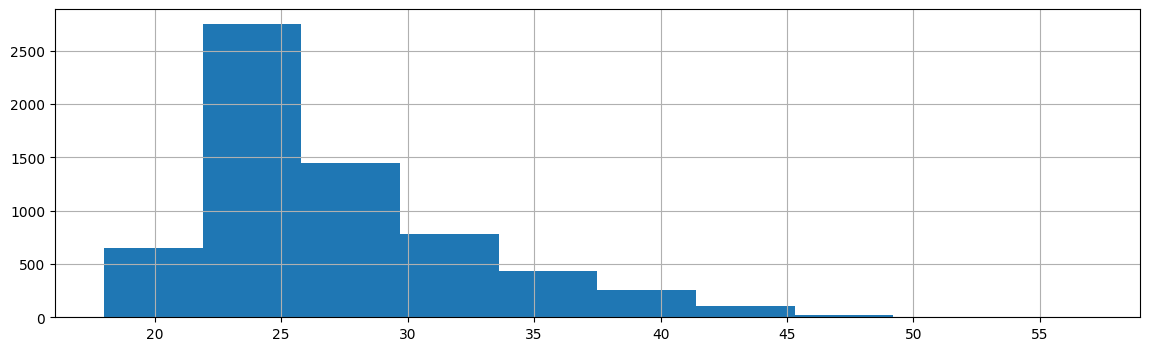

In [17]:
train_df['Age'].hist(figsize=(14,4))

# Splitting Dataset

## Split train data into validation and training datasets

In [18]:
X = train_df_c.drop(["Y","Program End Date","Program Start Date"],axis=1)
y = train_df_c["Y"]


In [19]:
X.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,GPA_Grade,distance
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,Good,0.0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,Excellent,822.5
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,Good,0.0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,Good,0.0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,Very Good,0.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train.shape

(5238, 23)

In [22]:
X_test.shape

(1310, 23)

# Encoding

In [23]:
X_train.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Program Presentation Method',
       'Program Days', 'Completed Degree', 'Level of Education',
       'Education Speaciality', 'College', 'University Degree Score',
       'University Degree Score System', 'Employment Status', 'Job Type',
       'Still Working', 'GPA_Grade', 'distance'],
      dtype='object')

In [24]:
le = LabelEncoder()
categorical_features = ['Gender', 'Home Region', 'Home City', 'Program ID', 
                        'Program Main Category Code', 'Program Sub Category Code', 
                        'Technology Type', 'Program Skill Level', 
                        'Program Presentation Method', 'Completed Degree', 
                        'Level of Education', 'Education Speaciality', 'College', 
                        'Employment Status', 'Job Type','Still Working',"Student ID","GPA_Grade"]

for feature in categorical_features:
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.fit_transform(X_test[feature])
    


# Modeling

In [25]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective ='binary:logistic', learning_rate = 1,
                          max_depth = 2, n_estimators = 2)



ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

xg.fit(X_train, y_train)
preds = xg.predict(X_test)

accuracy = accuracy_score(y_test, preds)

accuracy_percentage = accuracy * 100
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)

print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")



F1 Score: 0.64
Recall: 0.70
Precision: 0.60
Accuracy: 0.89


In [ ]:
train_df_c['Y'].value_counts()

Y
0    5509
1    1039
Name: count, dtype: int64

# light gradeint boosting machine

# Fine tuning


In [26]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV



In [32]:
import shap
# Define the parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'num_leaves': [12, 15, 22, 35],
    'learning_rate': [ 0.1, 0.5, 1.5, 2.5, 3, 6],
    'n_estimators': [200, 128, 64,255],
    'max_bin':[64, 128, 255 ],
}

# Create the LightGBM estimator
lgbm = lgb.LGBMClassifier(objective='binary', metric=['f1', 'accuracy', 'recall'], is_unbalanced=True)

# Create the grid search object
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)





Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 847, number of negative: 4391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1244
[LightGBM] [Info] Number of data points in the train set: 5238, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161703 -> initscore=-1.645612
[LightGBM] [Info] Start training from score -1.645612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [35]:
# Load JS visualization code for SHAP in the notebook
shap.initjs()

# Create the explainer with the best estimator
explainer = shap.TreeExplainer(grid_search.best_estimator_)

# Generate SHAP values
shap_values = explainer.shap_values(X_test)



c:\Users\Hamad\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


Variable Importance Plot - Global Interpretation


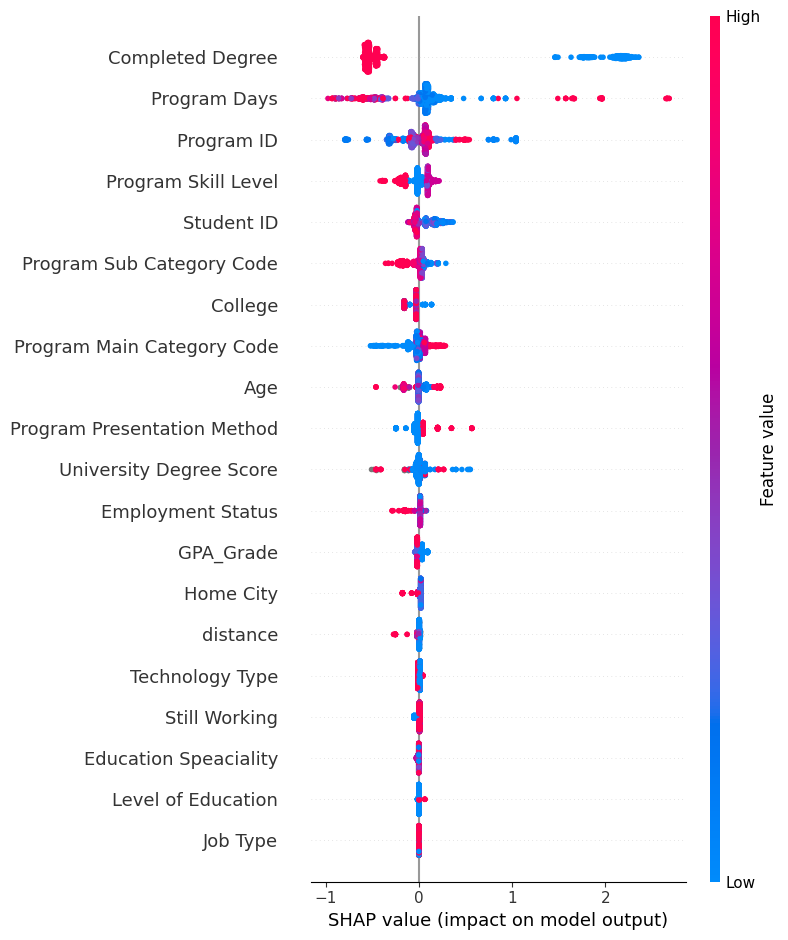

In [36]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

In [37]:
shap.summary_plot(shap_values[1], X_test)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [38]:
shap.summary_plot(shap_values[0], X_test)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

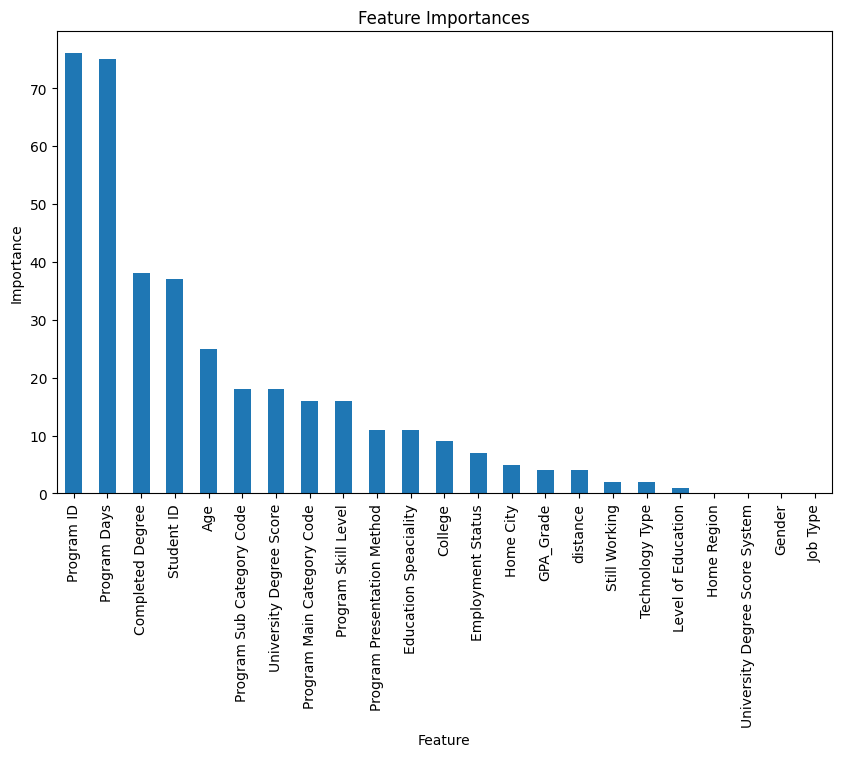

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming grid_search.best_estimator_ is your fitted LightGBM model
feature_importances = grid_search.best_estimator_.feature_importances_

# Creating a pandas series to hold the feature importances and sort them
feature_importance_series = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

# Plotting
feature_importance_series.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


[LightGBM] [Warning] Unknown parameter: is_unbalanced


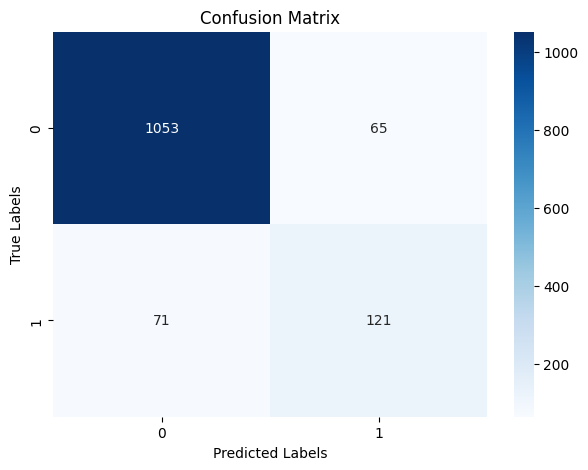

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


[LightGBM] [Warning] Unknown parameter: is_unbalanced


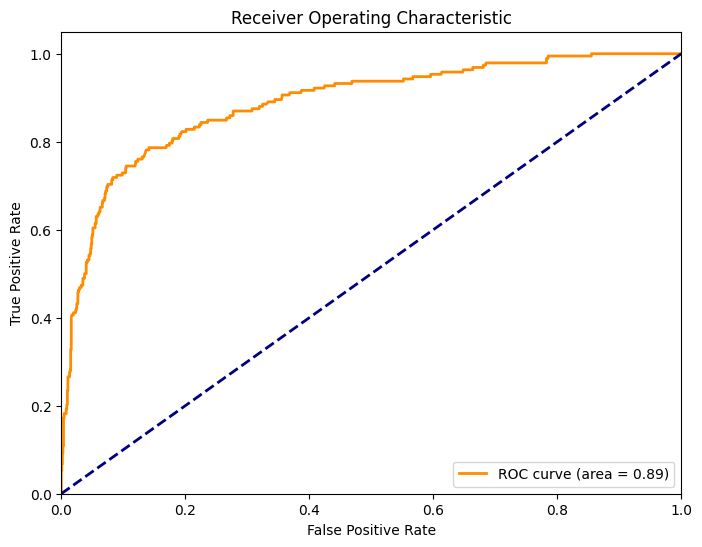

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
